In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import poisson
import pandas as pd

## Question 1
The following table indicates the number of 6-point scores in an American rugby match in the 1979 season.

![](table1.png)

Based on these results, we create a Poisson distribution with the sample mean parameter  = 2.435. Is there any reason to believe that at a .05 level the number of scores is a Poisson variable?

In [79]:
scores =[i for i in range(8)]
times = [35,99,104,110,62,25,10,3]
scores_df = pd.DataFrame(times, index=scores, columns=['Numb_Times'])
scores_df.reset_index(inplace=True)

In [80]:
scores_df.columns = ['numb_scores', 'numb_times']
scores_df

,numb_scores,numb_times
0,0,35
1,1,99
2,2,104
3,3,110
4,4,62
5,5,25
6,6,10
7,7,3


0.0
[4 3 5 2 2 4 1 2 1 4]


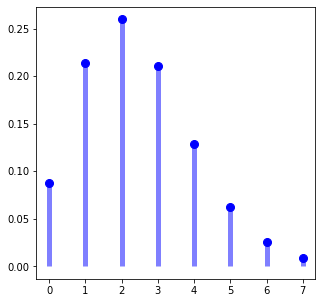

In [81]:
# your answer here

param = 2.435
po = stats.poisson(param)
print(po.pmf(param))     
print(po.rvs(10))
x = scores_df.numb_scores

fig, ax = plt.subplots(figsize=[5,5])
ax.plot(x, poisson.pmf(x, param), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, param), colors='b', lw=5, alpha=0.5)

In [101]:
poisson_prob =  stats.poisson.pmf(k=scores, mu=param)

In [102]:
poisson_prob

array([0.08759775, 0.21330051, 0.25969338, 0.21078446, 0.12831504,
       0.06248942, 0.02536029, 0.00882176])

In [84]:
scores_df['poisson_probs'] = poisson_prob

In [85]:
scores_df

,numb_scores,numb_times,poisson_probs
0,0,35,0.087598
1,1,99,0.213301
2,2,104,0.259693
3,3,110,0.210784
4,4,62,0.128315
5,5,25,0.062489
6,6,10,0.025360
7,7,3,0.008822


In [91]:
sum_0_6 = sum(scores_df['poisson_probs'][0:7])
sum_0_6
prob_7_more = 1 - sum_0_6
prob_7_more



0.012459153649037269

In [92]:
scores_df['poisson_probs'][7] = prob_7_more

/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [93]:
scores_df

,numb_scores,numb_times,poisson_probs
0,0,35,0.087598
1,1,99,0.213301
2,2,104,0.259693
3,3,110,0.210784
4,4,62,0.128315
5,5,25,0.062489
6,6,10,0.025360
7,7,3,0.012459


In [94]:
scores_df['exp_value'] = scores_df['numb_times'].sum() * scores_df['poisson_probs']

In [95]:
scores_df['difference'] = (scores_df['numb_times'] - scores_df['exp_value'])**2

In [96]:
scores_df

,numb_scores,numb_times,poisson_probs,exp_value,difference
0,0,35,0.087598,39.243791,18.009759
1,1,99,0.213301,95.558630,11.843025
2,2,104,0.259693,116.342632,152.340574
3,3,110,0.210784,94.431437,242.380166
4,4,62,0.128315,57.485137,20.383988
5,5,25,0.062489,27.995262,8.971593
6,6,10,0.025360,11.361410,1.853438
7,7,3,0.012459,5.581701,6.665179


In [97]:
chi2_score = sum(scores_df['difference']/scores_df['exp_value'])

In [98]:
chi2_score

6.4913106811098205

H0: The distribution follow a poisson distribution

H1: The distribution does not follow a poisson distribution


In [99]:
p=1
dof = len(scores) -1 - p
upper_bound_conf_int = stats.chi2.ppf(q=1-0.05, df=dof )
upper_bound_conf_int

12.591587243743977

In [100]:
confidence_interval = [0, upper_bound_conf_int]
confidence_interval

#Since the chi square score falls inside the cinfidence interval, we can not reject the null hypothesis

[0, 12.591587243743977]

In [103]:
stats.chisquare(scores_df["numb_times"], scores_df["exp_value"])


Power_divergenceResult(statistic=6.491310681109821, pvalue=0.4836889068537269)

## Question 2
The following are the ordered values of a random sample of SAT scores (university entrance exam) for several students: 852, 875, 910, 933, 957, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063. In previous years, the scores were presented by N (985,50). Based on the sample, is there any reason to believe that there has been a change in the distribution of scores this year? Use the level alpha = 0.05. 

H0: Boths samples follows the same distribution
H1: This year's scores follow a different distribution than the last year.


In [122]:
sat_scores =  [852, 875, 910, 933, 957, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063]

mu = 985
sigma = 50
n= len(sat)

prev_sat_scores = stats.norm.rvs(size = n, loc=985, scale=50)
stats.ks_2samp(sat_scores, prev_sat_scores)

Ks_2sampResult(statistic=0.26666666666666666, pvalue=0.6781382270680966)

In [ ]:
'''At a confidence level of 95%, we cannot reject the null Hypothesis'''

## Question 3
Let's analyze a discrete distribution. To analyze the number of defective items in a factory in the city of Medellín, we took a random sample of n = 60 articles and observed the number of defectives in the following table:

![](table4.png)

A poissón distribution was proposed since it is defined for x = 0,1,2,3, .... using the following model:

![](image1.png)

Does the distribution of defective items follow this distribution?

In [143]:
# your code here
numb_defective_items = [0,1,2,3,4]
observe_freq = [32, 15,0, 9, 4]
df = pd.DataFrame(zip(numb_defective_items, observe_freq))
df.columns =  ["numb_defective_items", "observe_freq"]

In [144]:
df

,numb_defective_items,observe_freq
0,0,32
1,1,15
2,2,0
3,3,9
4,4,4


In [145]:
sample_mean = sum(observe_freq[x]  * x for x in numb_defective_items)/sum(observe_freq)
sample_mean

poisson_prob =  stats.poisson.pmf(k=numb_defective_items, mu=sample_mean)


In [146]:
df['poisson_prob'] = poisson_prob
df

,numb_defective_items,observe_freq,poisson_prob
0,0,32,0.380349
1,1,15,0.367670
2,2,0,0.177707
3,3,9,0.057261
4,4,4,0.013838


In [148]:
df['exp_value'] = df['observe_freq'].sum() * df['poisson_prob']
df

,numb_defective_items,observe_freq,poisson_prob,exp_value
0,0,32,0.380349,22.820925
1,1,15,0.367670,22.060228
2,2,0,0.177707,10.662443
3,3,9,0.057261,3.435676
4,4,4,0.013838,0.830288


In [ ]:
## hypotheses testing 
# H0: number of defective pieces follows a poisson distribution 
# Ha:  number of defective piecesdoes not follow a poisson distribution

In [149]:
stats.chisquare(df["observe_freq"], df["exp_value"])

Power_divergenceResult(statistic=37.72656768931596, pvalue=1.2759420913385983e-07)

At a confidence level of 95%, we can reject the null hypothesis and say that we have statistical evidence for the alternative. We can assume that the distribution of defective items does not follow a poisson distribution.

## Question 4
A quality control engineer takes a sample of 10 tires that comes out of an assembly line. He would like to verify if the number of tires with defects observed over 200 days is 5%. (that is, if the sample comes from a binomial population with n = 10 and p = 0.05). 

In [ ]:
# your answer here

"""THERE IS NO DATA"""

## Question 5
A researcher gathers information about the patterns of physical activity (AF) of children in the fifth grade of primary school of a public school. He defines three categories of physical activity (1 = Low, 2 = Medium, 3 = High). He also inquires about the regular consumption of sugary drinks at school, and defines two categories (1 = consumed, 0 = not consumed). We would like to evaluate if there is an association between patterns of physical activity and the consumption of sugary drinks for the children of this school, at a level of 5% significance. The results are in the following table: 

![](table5.png)

In [189]:
#your answer here
import numpy as np
pe_df = pd.DataFrame({'yes': [32, 14, 6], 'no': [12, 22, 9]})
pe_df = pe_df.rename(index={0:'low', 1:'medium', 2:'high'})
pe_df


,yes,no
low,32,12
medium,14,22
high,6,9


PE: Physical activity

$H_0$: There is not an relation between PA and consumption of sugary drinks

$H_A$: There is an relation between PA and consumption of sugary drinks

In [190]:
stats.chi2_contingency(pe_df)[1]


0.004719280137040844

At a confidence level of 95%, we can reject the null hypothesis and suggest that there is significant statistical evidence to claim that there is a relation between physical activity and sugary drinks.

In [191]:
total_rows = list(pe_df.sum(axis= 1, skipna = True))

pe_df['total'] = total_rows
pe_df.loc['totals'] = pe_df.select_dtypes(pd.np.number).sum()
pe_df

,yes,no,total
low,32,12,44
medium,14,22,36
high,6,9,15
totals,52,43,95
